In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#from dtreeviz.trees import dtreeviz 
#from sklearn_evaluation import plot

In [4]:
#pip install sklearn_evaluation

In [18]:
from sklearn_evaluation.plot import grid_search

In [67]:
df = pd.read_csv('/Users/asare/Downloads/mutations(1).csv')
df.rename(columns = {'Unnamed: 0':'Individuals'},inplace=True)

In [62]:
patients=[]
for i in df['Individuals']:
    if i[0]=='C':
        patients.append('C')
    else:
        patients.append('NC')
        
df['Individuals'] = patients


#### Countplot of the samples

In [23]:
#sns.countplot(df['Individuals'])

#### Performance of model before parameter tuning

In [24]:
X = df.drop('Individuals', axis=1)
y = df['Individuals']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier()

In [26]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#clf.estimators_

#### Visualizing the first decision tree in the forest

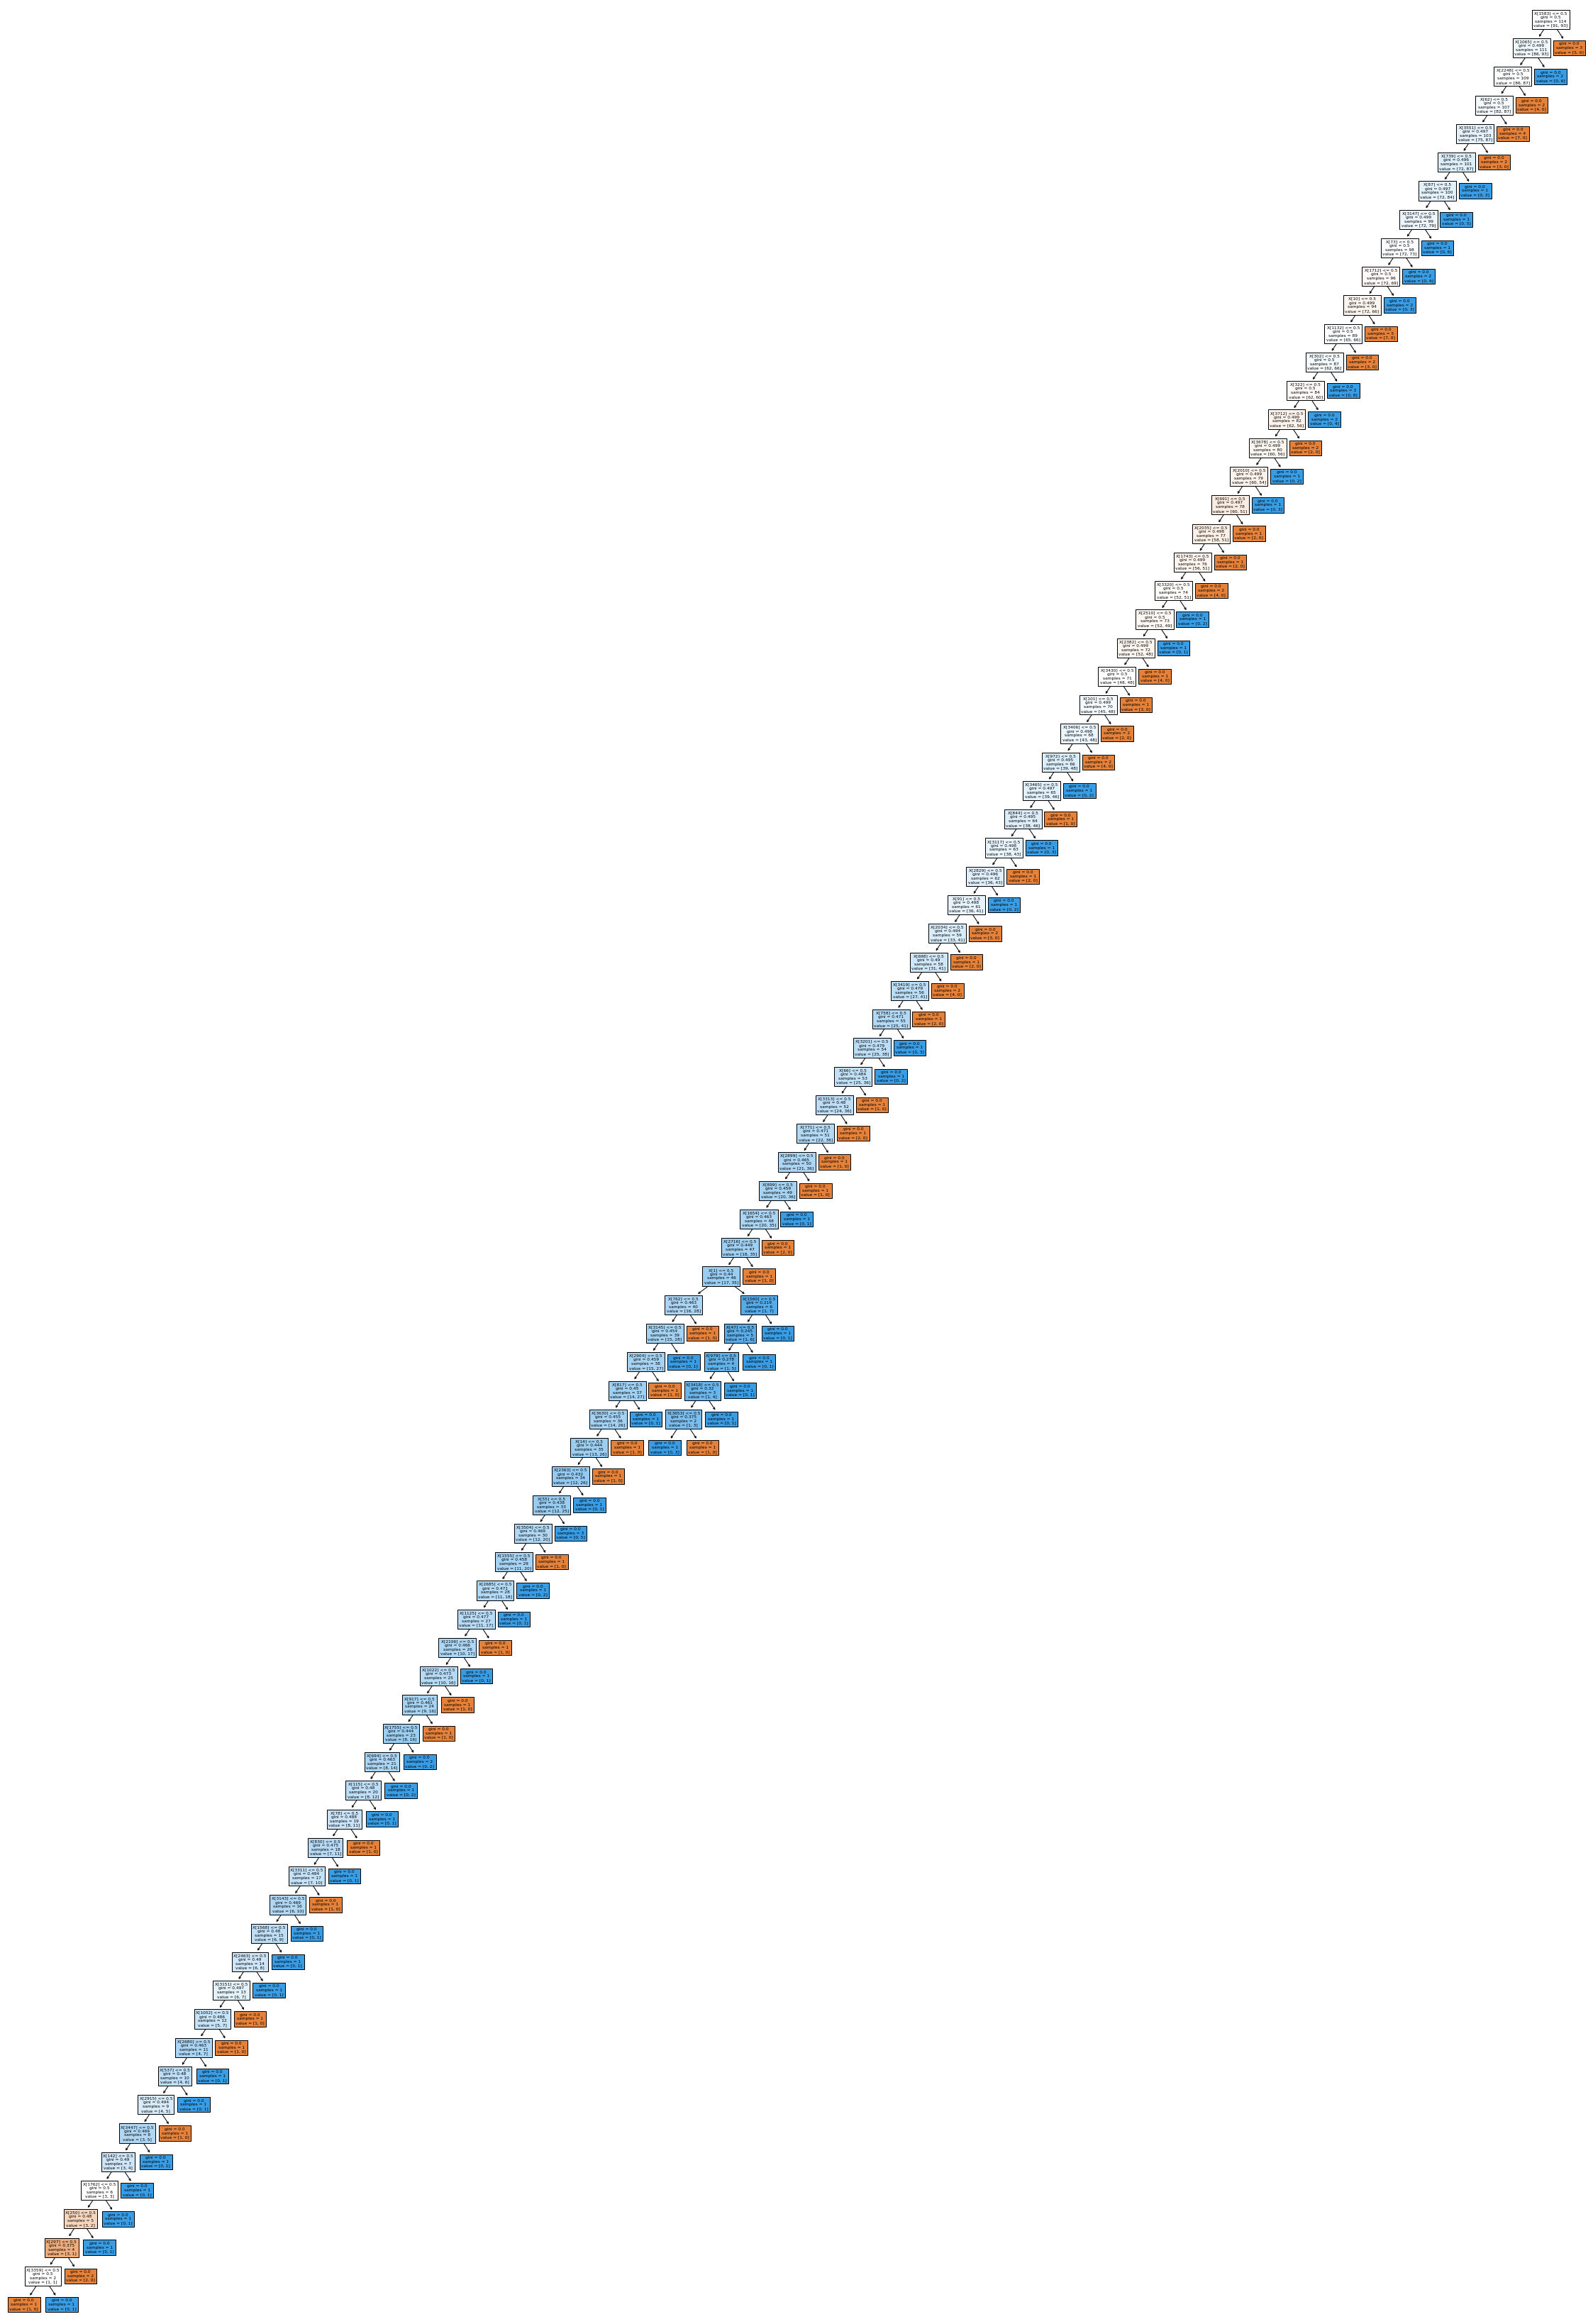

In [29]:
plt.figure(figsize=(40,60))
tree.plot_tree(clf.estimators_[0], filled=True) #, feature_names=X.columns
plt.show()

In [30]:
y_pred = clf.predict(X_test)

###### Model accuracy before parameter tuning

In [31]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5652173913043478


#### Average from 10 fold cross validation

In [32]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.6608695652173913


##### Confusion matrix

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 4, 17],
       [ 3, 22]])

##### Plot of the confusion matrix

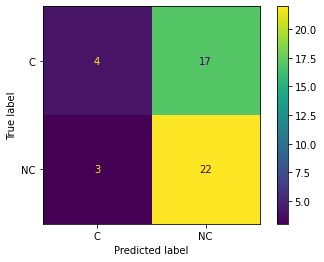

In [34]:
plot_confusion_matrix(clf, X_test, y_test) 


##### Data Filtering

In [149]:
d_ = pd.read_csv('/Users/asare/Downloads/mutations(1).csv')
d_.rename(columns = {'Unnamed: 0':'Individuals'},inplace=True)

In [150]:
new_df = d_.copy()
new_df.set_index('Individuals',inplace=True)

##### Removing features that cover a small number of cancer samples and large number of noncancer samples

In [151]:
ind=[]
ind1=[]
for i in new_df.index:
    #print(i)
    if i[0] == 'C':
        ind.append(i)
for i in new_df.index:
    #print(i)
    if i[0] == 'N':
        ind1.append(i)

In [152]:
new_df1 = new_df.filter(items=ind,axis=0)
new_df2 = new_df.filter(items=ind1,axis=0)

##### Removing features that cover a small number of cancer samples and large number of noncancer samples

In [153]:
b=new_df1.sum(axis=0)
b1=new_df2.sum(axis=0)
c=[]
d=[]
for i in new_df.columns:
    if b[i]<=8:
        c.append(i)

for i in new_df.columns:
    if b1[i]>=10:
        d.append(i)
len(d)
e=c+d
len(e)

3797

In [154]:
new_df3 = new_df.drop(e, axis=1)
#new_df3

In [155]:
new_df4 = new_df3.sum(axis=1)

##### Removed samples

In [218]:
removed_samples = []
for i in new_df4.index:
    if new_df4.loc[i]==0:
        removed_samples.append(i)
        
np.array(removed_samples)

array(['C1', 'C3', 'NC1', 'C5', 'NC2', 'NC3', 'NC4', 'NC5', 'C9', 'NC6',
       'NC7', 'NC8', 'NC9', 'C11', 'C12', 'C13', 'NC11', 'NC12', 'C16',
       'C17', 'NC14', 'NC15', 'NC16', 'NC17', 'NC18', 'NC19', 'NC20',
       'C21', 'C22', 'NC21', 'C24', 'NC23', 'NC24', 'NC25', 'NC26', 'C25',
       'NC27', 'NC28', 'NC29', 'C27', 'NC30', 'C30', 'C31', 'C33', 'C34',
       'C35', 'C36', 'NC31', 'C37', 'C38', 'NC33', 'NC34', 'C39', 'NC35',
       'C40', 'C42', 'NC36', 'C43', 'C46', 'NC38', 'NC39', 'NC41', 'NC42',
       'NC43', 'NC44', 'C47', 'NC45', 'C48', 'NC46', 'NC47', 'NC48',
       'NC49', 'NC50', 'C51', 'C52', 'NC52', 'NC54', 'C54', 'NC55',
       'NC56', 'NC57', 'NC58', 'NC59', 'NC60', 'C56', 'NC61', 'C58',
       'NC62', 'NC63', 'NC64', 'NC65', 'NC66', 'C59', 'NC68', 'NC69',
       'NC70', 'NC71', 'C61', 'C63', 'C64', 'NC74', 'NC75', 'C67', 'NC76',
       'NC78', 'C73', 'C75', 'NC79', 'NC80', 'NC81', 'NC83', 'C77',
       'NC85', 'C78', 'NC87', 'NC88', 'NC89', 'C79', 'C80', 'C81', '

In [157]:
new_df5 = new_df3.drop(labels=removed_samples,axis=0)
#new_df5

In [158]:
d_f = d_.drop(e,axis=1)

In [159]:
for i in removed_samples:
    d_f.drop(d_f[d_f['Individuals']==i].index, inplace = True)    

In [160]:
s=[]
for i in d_f['Individuals']:
    if i[0]=='C':
        s.append(i)
len(s)

47

In [161]:
d_f.head()

,Individuals,SRFBP1_GRCh38_5:122027171-122027171_3'UTR_DEL_T-T--,XYLT2_GRCh38_17:50356606-50356606_Frame-Shift-Del_DEL_C-C--,ZNF644_GRCh38_1:90916736-90916736_3'UTR_DEL_A-A--,SLC3A2_GRCh38_11:62882057-62882057_Frame-Shift-Del_DEL_A-A--,MKRN3_GRCh38_15:23567536-23567536_3'UTR_DEL_T-T--,DOCK3_GRCh38_3:51380173-51380173_Frame-Shift-Del_DEL_C-C--,ELFN1_GRCh38_7:1747915-1747915_3'UTR_DEL_A-A--,BRAF_GRCh38_7:140753336-140753336_Missense-Mutation_SNP_A-A-T,C8orf48_GRCh38_8:13568072-13568072_3'UTR_DEL_T-T--,SCN2B_GRCh38_11:118176520-118176520_5'UTR_DEL_A-A--,ATP5EP2_GRCh38_13:27945509-27945509_3'UTR_DEL_A-A--,MAGEA1_GRCh38_X:153183523-153183523_3'UTR_DEL_T-T--,KRAS_GRCh38_12:25245347-25245347_Missense-Mutation_SNP_C-C-T_C-T-T,RNF43_GRCh38_17:58357800-58357800_Frame-Shift-Del_DEL_C-C--,MUM1L1_GRCh38_X:106207643-106207643_3'UTR_DEL_T-T--_T----,SP8_GRCh38_7:20786861-20786861_5'UTR_DEL_T-T--,C5orf24_GRCh38_5:134856972-134856972_3'UTR_DEL_T-T--,ZBTB18_GRCh38_1:244056272-244056272_3'UTR_DEL_A-A--,ZBTB20_GRCh38_3:114339156-114339156_Frame-Shift-Del_DEL_G-G--
1,C2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,C4,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
9,C6,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0
10,C7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11,C8,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0


In [163]:
patients1=[]
for i in d_f['Individuals']:
    if i[0]=='C':
        patients1.append('C')
    else:
        patients1.append('NC')
        
d_f['Individuals'] = patients1

In [165]:
d_f

,Individuals,SRFBP1_GRCh38_5:122027171-122027171_3'UTR_DEL_T-T--,XYLT2_GRCh38_17:50356606-50356606_Frame-Shift-Del_DEL_C-C--,ZNF644_GRCh38_1:90916736-90916736_3'UTR_DEL_A-A--,SLC3A2_GRCh38_11:62882057-62882057_Frame-Shift-Del_DEL_A-A--,MKRN3_GRCh38_15:23567536-23567536_3'UTR_DEL_T-T--,DOCK3_GRCh38_3:51380173-51380173_Frame-Shift-Del_DEL_C-C--,ELFN1_GRCh38_7:1747915-1747915_3'UTR_DEL_A-A--,BRAF_GRCh38_7:140753336-140753336_Missense-Mutation_SNP_A-A-T,C8orf48_GRCh38_8:13568072-13568072_3'UTR_DEL_T-T--,SCN2B_GRCh38_11:118176520-118176520_5'UTR_DEL_A-A--,ATP5EP2_GRCh38_13:27945509-27945509_3'UTR_DEL_A-A--,MAGEA1_GRCh38_X:153183523-153183523_3'UTR_DEL_T-T--,KRAS_GRCh38_12:25245347-25245347_Missense-Mutation_SNP_C-C-T_C-T-T,RNF43_GRCh38_17:58357800-58357800_Frame-Shift-Del_DEL_C-C--,MUM1L1_GRCh38_X:106207643-106207643_3'UTR_DEL_T-T--_T----,SP8_GRCh38_7:20786861-20786861_5'UTR_DEL_T-T--,C5orf24_GRCh38_5:134856972-134856972_3'UTR_DEL_T-T--,ZBTB18_GRCh38_1:244056272-244056272_3'UTR_DEL_A-A--,ZBTB20_GRCh38_3:114339156-114339156_Frame-Shift-Del_DEL_G-G--
1,C,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,C,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
9,C,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0
10,C,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11,C,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,C,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
221,C,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
222,C,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
226,NC,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


##### Model performance after initial filtering

In [184]:
X1 = d_f.drop('Individuals', axis=1)
y1 = d_f['Individuals']

In [185]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)
new_clf = RandomForestClassifier()

In [186]:
new_clf.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Visualizing the first tree

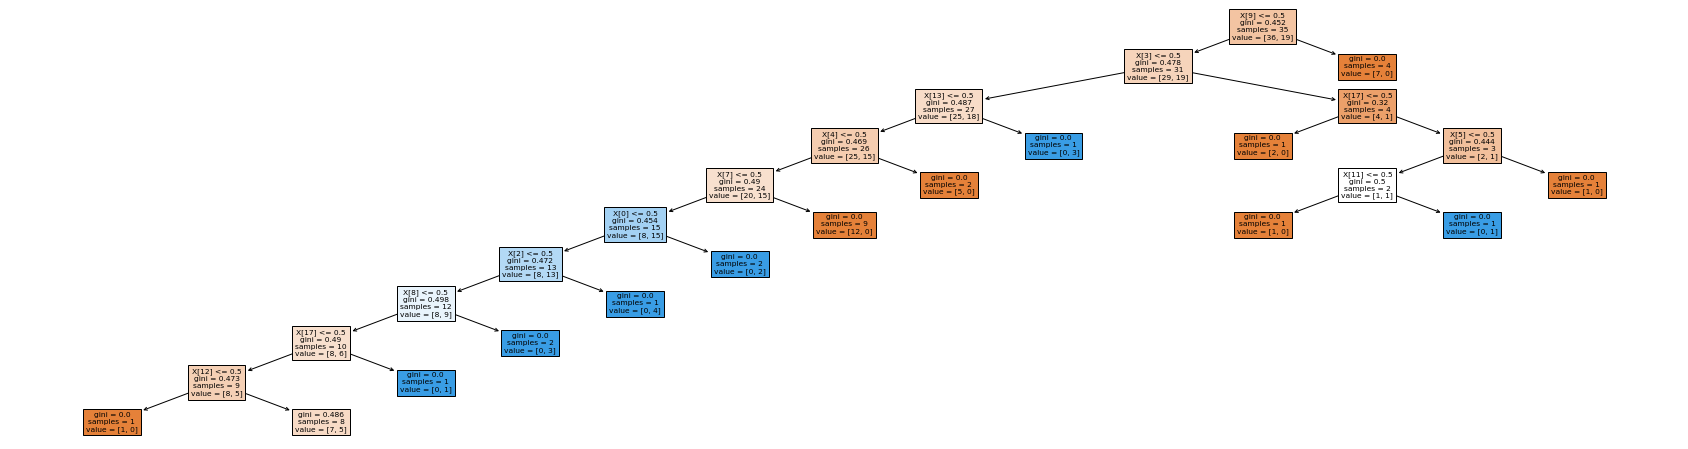

In [187]:
plt.figure(figsize=(30,8))
tree.plot_tree(new_clf.estimators_[0], filled=True) #, feature_names=X.columns
plt.show()

In [188]:
y1_pred = new_clf.predict(X1_test)
y1_pred

array(['C', 'C', 'C', 'C', 'C', 'NC', 'C', 'C', 'C', 'C', 'NC', 'C', 'C',
       'C'], dtype=object)

In [189]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y1_test, y1_pred))

ACCURACY OF THE MODEL:  0.7857142857142857


##### 10 fold cross validation

In [190]:
scores1 = cross_val_score(new_clf, X1, y1, cv=10, scoring='accuracy')
print(scores1.mean())

0.6952380952380952


##### Confusion matrix

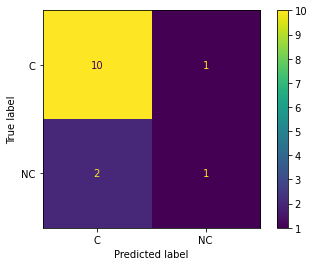

In [191]:
plot_confusion_matrix(new_clf, X1_test, y1_test) 

##### Performance of the model after various parameter tuning using gridsearch

In [193]:
rfc = RandomForestClassifier(random_state=42)
parameters = {
    "n_estimators":[1,10,50,100],
    #"max_depth":[2,4,5,7,None],
    "criterion":['entropy','gini'],#,'log_loss'],
    "max_features":['sqrt','log2']#, 'auto']
}

In [195]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 5)
CV_rfc.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [196]:
grid_scores = CV_rfc.cv_results_


#### Plot showing how the number of trees affect the model

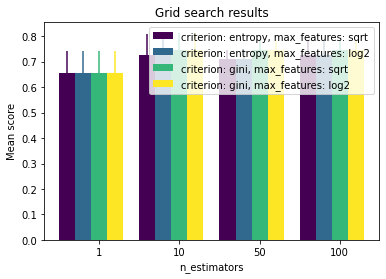

In [197]:
grid_search(CV_rfc.cv_results_, change='n_estimators', kind='bar',sort=False)
plt.show()

#### Plot showing how criterion affects the model

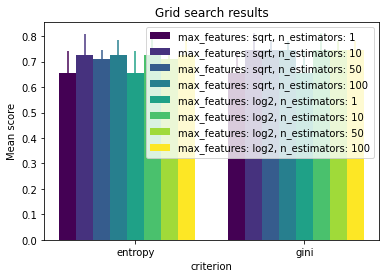

In [198]:
grid_search(CV_rfc.cv_results_, change='criterion', kind='bar',sort=False)
plt.show()

##### Plot showing how number of features selected affect the model

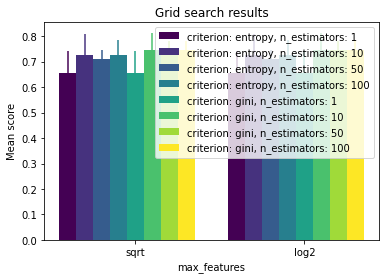

In [199]:
grid_search(CV_rfc.cv_results_, change='max_features', kind='bar',sort=False)
plt.show()

<AxesSubplot:title={'center':'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

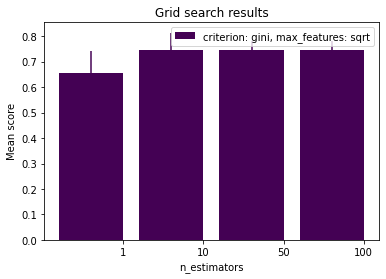

In [200]:
grid_search(CV_rfc.cv_results_, change='n_estimators',
            subset={'max_features': 'sqrt', 'criterion': 'gini'},
            kind='bar')

<AxesSubplot:title={'center':'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

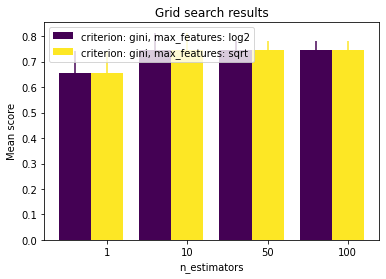

In [201]:
grid_search(CV_rfc.cv_results_, change='n_estimators',
            subset={'max_features': ['sqrt', 'log2'], 'criterion': 'gini'},
            kind='bar')

#### Best parameters according to GridSearch

In [202]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}

#### Modeling the data using the best parameters selected

In [203]:
new_clf1 = RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=10)
new_clf1.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [204]:
pred_ = new_clf1.predict(X1_test)

##### Model accuracy

In [205]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y1_test, pred_))

ACCURACY OF THE MODEL:  0.7857142857142857


In [207]:
from sklearn.feature_selection import SelectFromModel

In [208]:
sel = SelectFromModel(RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=10))
sel.fit(X1_train, y1_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,


##### Important features identified

In [211]:
important_features= X1_train.columns[(sel.get_support())]
important_features

Index(['SRFBP1_GRCh38_5:122027171-122027171_3'UTR_DEL_T-T--',
       'XYLT2_GRCh38_17:50356606-50356606_Frame-Shift-Del_DEL_C-C--',
       'ZNF644_GRCh38_1:90916736-90916736_3'UTR_DEL_A-A--',
       'BRAF_GRCh38_7:140753336-140753336_Missense-Mutation_SNP_A-A-T',
       'C8orf48_GRCh38_8:13568072-13568072_3'UTR_DEL_T-T--',
       'SCN2B_GRCh38_11:118176520-118176520_5'UTR_DEL_A-A--',
       'MAGEA1_GRCh38_X:153183523-153183523_3'UTR_DEL_T-T--',
       'RNF43_GRCh38_17:58357800-58357800_Frame-Shift-Del_DEL_C-C--',
       'ZBTB18_GRCh38_1:244056272-244056272_3'UTR_DEL_A-A--'],
      dtype='object')

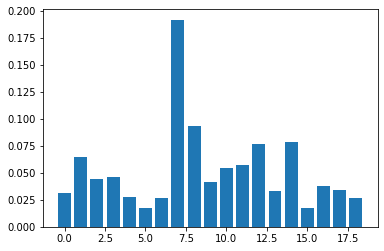

<Figure size 432x288 with 0 Axes>

In [225]:
plt.bar(range(len(new_clf1.feature_importances_)), new_clf1.feature_importances_)
plt.show()
plt.savefig('important_features_bar_graph')

In [206]:
new_clf1.feature_importances_

array([0.03123155, 0.06444453, 0.04450354, 0.04599291, 0.02715044,
       0.01752903, 0.02684817, 0.1917629 , 0.09368615, 0.04153235,
       0.05449004, 0.05726605, 0.07643773, 0.03271009, 0.07887835,
       0.01756406, 0.03749981, 0.03401295, 0.02645935])

Feature: 0, Score: 0.03123
Feature: 1, Score: 0.06444
Feature: 2, Score: 0.04450
Feature: 3, Score: 0.04599
Feature: 4, Score: 0.02715
Feature: 5, Score: 0.01753
Feature: 6, Score: 0.02685
Feature: 7, Score: 0.19176
Feature: 8, Score: 0.09369
Feature: 9, Score: 0.04153
Feature: 10, Score: 0.05449
Feature: 11, Score: 0.05727
Feature: 12, Score: 0.07644
Feature: 13, Score: 0.03271
Feature: 14, Score: 0.07888
Feature: 15, Score: 0.01756
Feature: 16, Score: 0.03750
Feature: 17, Score: 0.03401
Feature: 18, Score: 0.02646


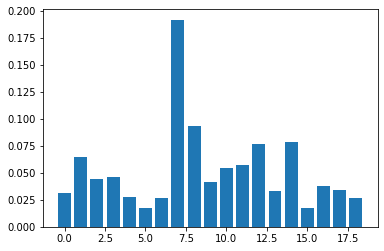

In [215]:
importance = new_clf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###### The top 10 features ranked in order of importance

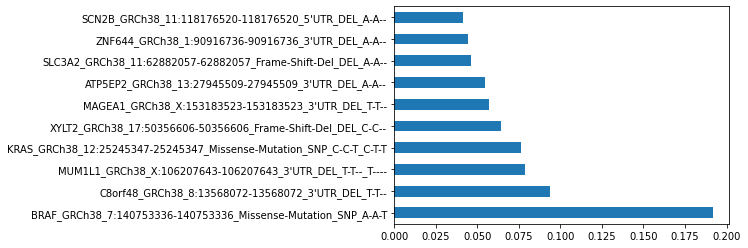

<Figure size 432x288 with 0 Axes>

In [224]:
feat_importances = pd.Series(new_clf1.feature_importances_, index=X1_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
plt.savefig('feat_importance')